<a href="https://colab.research.google.com/github/kio15978/machine-learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_04_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80%2C_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **럭키백에 들어갈 생선 확률 계산**

럭키백에 들어갈 생선 7개

길이, 높이, 두께, 대각선 길이, 무게 특성 이용



---




## **k-최근접 이웃 분류기**

k-최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율 확률이라고 출력!

# **데이터 준비**

인터넷에서 직접 CSV 파일 읽어들이기 

판다스 read_csv() 함수 -> csv 파일 데이터프레임으로 변환

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


**데이터 프레임이 뭔가요?**

2차원표 형식의 주요 데이터 구조 

통계와 그래프를 위한 메서드를 풍부하게 제공하며, 넘파이로 상호변환이 쉽고 사이킷런과도 잘 호환됨:)

### **Species열에서 고유값 추출**
* unique() : 고유한 값 추출

In [3]:
print(pd.unique(fish['Species']))  

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


### **입력 데이터로 만들  데이터프레임 열 선택**

데이터프레임에서 원하는 열 리스트로 나열

species 열 - 타깃  / 나머지 5개 열 - 입력 데이터

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()  
# 넘파이 배열로 바꾸어 fish_iput에 저장

### **타깃 데이터로 만들 데이터프레임 열 선택**

In [5]:
fish_target = fish['Species'].to_numpy()   # 넘파이 배열로 바꾸어 fish_target에 저장

### **훈련 세트 - 테스트 세트 나누기**

In [6]:
from sklearn.model_selection import train_test_split  # 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

### **표준화 전처리**

standardscaler 클래스 사용 훈련/테스트 테스 표준화 전처리

훈련 세트의 통계 값으로 테스트 세트 변환!

In [7]:
from sklearn.preprocessing import StandardScaler  # 훈련세트와 테스트 세트를 표준화 전처리하기
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# **k-최근접 이웃 분류기의 확률 예측**

사이킷런 KNeighborsClassifier 클래스 객체 만들기 -> 훈련세트 모델 훈련 -> 훈련 세트, 테스트 세트 점수 확인 

In [8]:
from sklearn.neighbors import KNeighborsClassifier  # KNeighborsClassifier 클래스 객체 만들고 훈련 세트와 테스트 세트 확인
kn = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃 개수 k를 3으로 지정         
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### **다중 분류 : 타깃 데이터에 2개 이상의 클래스가 포함**

타깃 데이터 만들 때 fish['Species'] 사용 -> 훈련 세트, 테스트 세트의 타깃 데이터에도 7개의 생선 종류 들어감 = 다중분류

사이킷런 통해 문자열로 된 타깃값 그대로 사용 가능

주의 - 타깃값 그대로 사이킷런 모델 전달 -> 순서 자동으로 알파벳 순

KNeighborClassifier에서 정렬된 값은 classess_ 속성에 저장되어 있음﻿


In [9]:
print(kn.classes_)  # KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


-->  print(pd.unique(fish['Species']))   순서와 다름

### **예측**

* predict() : 타깃값으로 예측 출력

In [10]:
print(kn.predict(test_scaled[:5]))  # predict() 메서드는 친절하게 타깃값으로 예측을 출력, 처음 5개 샘플의 타깃값을 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


처음 5개 샘플의 예측값이 어떤 확률로 만들어졌을까?



### **클래스별 확률값**

* predict_proba() : 클래스별 확률값 반환

* round() : 반올림   decimals 매개변수로 소수점 아래 자릿수 지정 (기본 소수점 첫째 자리) 

In [11]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])  # classes_속성과 같은 predict_proba()
print(np.round(proba, decimals=4)) # 소수점 네 번째 자리까지 표기. 즉, 다섯 번째 자리에서 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba() 출력 순서 = classes_  출력 순서

한 줄 (행) ~ 샘플 !  한 줄(행)에 한 개(열) 이 타깃 예측에 사용한 5개 



### **모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인**

네번쨰 샘플의 최근접 이웃 클래스 확인

In [12]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


다섯 번째 클래스 Roach 1개 ->  확률 1/3 = 0.3333

세 번째 클래스 Perch 2개 -> 확률 2/3 = 0.6667





그런데...!!!  3개의 최근접 이웃을 사용하기 때문에 가능한 확률을 0/3, 1/3, 2/3, 3/3이 전부

# **04-1. 로지스틱 회귀**

## **로지스틱 회귀**
이름은 회귀이지만 분류 모델임

선형 회귀와 동일하게 선형 방정식 학습



***z = a x (weight) + b x (length) + c x (diagonal) + d x (height) + e x (width) + f***


a,b,c,d,e = 가중치 or 계수

확률 0~1(또는 0~100%) 값이 되어야 함



## **시그모이드 함수 ( 로지스틱 함수)**

z가 아주 큰 음수일 때 0, z가 아주 큰 양수일 때 1이 되도록 사용

선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수

=> z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고,  z가 무한하게 큰 양수가 될 때는 1에 가까워짐

z가 어떤 값이 되더라도 ∮는 절대 0~1 사이 범위 벗어나지 않음

### **넘파이 이용해서 시그모이드 그래프 그리기**

-5와 5 사이에 0.1 간격으로 배열 z를 만든 다음, z위치마다 시그모이드 함수 계산

* np.exp() : 지수 함수 계산

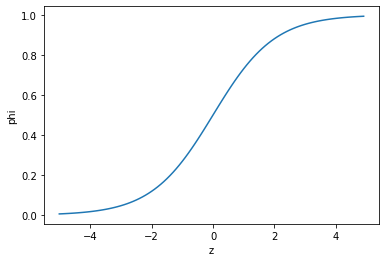

In [13]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## **로지스틱 회귀로 이진 분류 수행하기**



이진분류 : 시그모이드 함수 출력 > 0.5  양성 클래스 /  < 0.5  음성 클래스

= 0.5일 경우 라이브러리마다 다름 (사이킷런은 음성)

* 불리언 인덱싱 : 넘파이 배열은  True(1), False(0) 값으로만 구성

In [14]:
# 불리언 인덱싱(boolean indexing)
# 5개의 원소로 이루어진 배열 중 A, C 만 골라내기
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


A ~ E까지 5개로 이루어진 배열

'A', 'C'만 골라내려면  첫 번째, 세 번째 원소만 True, 나머지 원소 모두 False인 배열 전달



이와 같은 방식으로

### **훈련 세트에 도미(Bream), 빙어(Smelt) 행만 골라내기**

비교 연산자 이용해 도미, 빙어 행 모두 True로 만들 수 있음

train_target == 'Bream'은 train_target 배열에서 'Bream'인 것은 True, 나머지는 모두 False 배열 반환

도미와 빙어에 대한 비교 결과를 비트 OR( | ) 연산자 이용해 합 -> 모디와 빙어에 대한 행만 골라낼 수 있음



In [15]:
# 불리언 인덱싱으로 도미(Bream)와 빙어(Smelt)의 행만 골라내기
# 비교 결과를 비트 or 연산자(|)를 사용해 합치면 골라낼 수 있다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

# bream_smelt_indexes 배열은 도미와 비어일 경우 True, 그 외에는 False

bream_smelt_indexes 배열에는 도미, 빙어일 경우 True, 그 외는 모두 False값이 들어 있음

이 배열을 사용해 train_bream_smelt, target_bream_smelt 배열에 불리언 인덱싱 적용


-> 도미, 빙어 데이터만 골라낼 수 있음
 

In [16]:
# 도미와 빙어만 골라낸 데이터로 로지스틱 회귀 모델 훈련하기
# LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지에 존재

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

### **처음 5개 샘플 예측**

In [17]:
# 훈련한 모델을 사용해 처음 5개 샘플 예측하기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


### **예측 확률 출력**

* predict_proba() : 예측 확률

In [18]:
# predict_proba() 메서드를 통해 5개 샘플에 대한 예측 확률 출력
# 첫번째 열이 음성클래스(0)에 대한 확률, 두번째 열이 양성큻래스(1)
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


샘플마다 2개 확률 출력

첫 번째 열 음성 클래스(0)에 대한 확률

두 번째 열 양성 클래스(1)에 대한 확률






### **어떤 것이 양성일지 확인**

bream, smelt 중에 어떤 것이 양성일까?

사이킷런 타깃값 알파벳순으로 정렬하여 사용

In [19]:
# 첫번째 열 0은 뭐고 1은 뭘까.
# 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용- 속성확인으로 확인해보자
print(lr.classes_)

['Bream' 'Smelt']


bream -> 음성(0) 클래스       smelt -> 양성(1) 클래스

위의 predict_proba() 배열 값 보면

두 번째 샘플만 양성 클래스인 빙어 확률 높음 / 나머지 모두 Bream으로 예측



### **로지스틱 회귀가 학습한 계수 확인**

In [20]:
# 선형 회귀처럼 로지스틱 회귀가 학습한 계수 확인하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


따라서 이 로지스틱 회귀 모델이 학습한 방정식은

z = -0.404 x (weight) - 0.576 x (length) -0.663 x (diagonal) - 1.013 x (height) -0.732 x (width) - 2.161


로지스틱 회귀는 선형 회귀와 매우 비슷

### **LogisitcRegression 모델로 z값 계산**

* decision_function() : z 값 출력

In [21]:
# LogisticRegression 클래스는 decision_function()메서드로 z값을 출력할 수 있다!
# 처음 5개 샘플의 z 값을 출력해보자

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


### **시그모이드 함수에 값 통과**

위 z값을 시그모이드 함수에 통과시키면 확률 얻을 수 있음

* expit() : 사이파이 라이브러리에 시그모이드 함수

In [22]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## **로지스틱 회귀로 다중 분류 수행하기**
LogisticRegression 클래스 반복적인 알고리즘 사용

* max_iter : 반복 횟수 지정 (기본값 100) 



릿지 회귀와 같이 계수의 제곱을 규제함 => L2 규제

* C : LogisticRegression 규제를 제어하는 매개변수

 작을수록 규제가 커짐  C 기본값 1





In [23]:
# 규제를 완화하기 위해 C를 20으로 늘림
# 7개의 생선 데이터가 모두 들어있는 리스트 사용
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


### **테스트 세트 처음 5개 샘플 예측**

In [24]:
# 훈련 세트와 테스트 세트가 과대적합이나 과소적합이 아닌 것으로 보여짐.
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


### **테스트 세트 처음 5개 샘플 예측 확률 출력**

In [25]:
# 처음 5개 샘플에 대한 예측 확률을 출력
# 출력을 간소하게 하기 위해 소수점 네번째 자리에서 반올림
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


5개 샘플에 대한 예측 -> 5개 행 출력

7개 생선에 대한 확률 => 7개 열

### **classes_ 속성에서 클래스 정보 확인**

In [26]:
# 출력한 5개 샘플들의 클래스 정보 확인하기
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


이진 분류  - 샘플마다 2개의 확률 출력

다중 분류 - 샘플마다 클래스 개수만큼 확률 출력

이 중에서 가장 높은 확률이 예측 클래스가 됨



### **coef_ intercept_ 크기 출력**

In [27]:
# 다중 분류일 경우 선형 방정식은 어떠한 모습일까?
# coef_intercept_의 크기를 출력해보자
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


5개의 특성 사용 coref_ 배열의 열 5

그런데 행 7, intercept도 7개

 

다중 분류 - 클래스마다  z값을 하나씩 계산 -> 가장 높은 z값 출력하는 클래스가 예측 클래스

z를 7개 계산



## **> 소프트맥스 함수**
여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듦

이를 위해 지수 함수를 사용 ~ 정규화된 지수 함수라고도 부름

소프트맥스 함수 사용 => 7개의 z값을 확률로 변환



7개의 z 값의 이름 z1 ~ z7

z1~ z7까지 값을 사용해 지수 함수 e^z1 ~ e^z7 계산해 모두 더한다. 이를 e_sum이라고 함

그 다음 e^z1 ~ e^z7을 각각 e_sum으로 나누어 준다

s1에서 s7까지 모두 더하면 분자와 분모가 같아지므로 1이 됨



=> decision_function() 매서드로 z1 ~ z7까지 값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꾸기


### **테스트 세트 처음 5개 샘플에 대한 z1 ~ z7 값**

In [28]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]



### **decision 배열 softmax() 함수 전달**

사이파이 소프트맥스 함수 - scipy.special 아래 softmax() 함수

In [29]:
# 사이파이는 소프트맥스 함수도 제공함
# scipy.special 아래에 softmax() 함수를 임포트해 사용함
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


axis : 소프트맥스를 계산할 축 지정

   axis = 1 각 행, 즉 각 샘플에 대해 소프트맥스 계산
   
         aixs 지정하지 않으면 배열 전체에 대해 소프트맥스 계산


#**04-2 확률적 경사 하강법**


## **SGDClassifier**

In [30]:
import pandas as pd  # fish_csv_data 파일에서 판다스 데이터프레임을 만듦
fish = pd.read_csv('https://bit.ly/fish_csv')

### **입력 / 타깃 데이터**

In [31]:
# Species 열을 제외한 나머지 5개 입력 데이터로 사용. Species 열은 타깃데이터임.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

### **훈련 세트 / 테스트 세트**

* train_test_split( ) : 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어줌

In [32]:
# 사이킷런의 train_test_split() 함수를 사용해 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

### **표준화 전처리**
훈련 세트와 테스트 세트 특성 표준화 전처리



In [33]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### **SGDClassifier 임포트**
사이킷런에서 확률적 경사 하강법 제공하는 대표적 분류용 클래스

sklearn.linear_model 패키지 아래 SGDClassifier

In [34]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 SGDClassifier
from sklearn.linear_model import SGDClassifier

### **SGDClassifier의 객체 만들 때 2개의 매개변수 지정**
### **훈련 / 테스트 세트 정확도 점수 출력**
* loss  : 손실 함수 종류 지정   

   loss='log' 로지스틱 손실 함수

* max_iter : 수행할 에포크 횟수

In [35]:
# loss는 손실 함수의 종류 지정, loss='log'로 지정하여 로지스틱 손실 함수를 지정
# max_iter는 수행해야할 에포크 횟수를 지정함
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


+) convergenceWaring -> 모델이 충분히 수렴하지 않았다 -> max_iter 매개변수 값을 늘려주는 게 좋음

### **모델 추가 훈련**

* partial_fit() : 모델 이어서 훈련

    fit() 메서드와 사용법 같지만, 호출할 때마다 1 에포크씩 이어서 훈련할 수 있음



In [36]:
# 모델을 이어서 추가 훈련을 할 때에는 partial_fit() 메서도 사용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) 

0.8151260504201681
0.85


(SGDClassifier 객체에 한 번에 훈련 세트 전체를 전달했지만

알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행함)


에포크를 한 번 더 실행하니 정확도가 향상됨

에포크를 얼마나 더 훈련해야 할까? 어떤 기준으로 반복할까

## **에포크와 과대 / 과소적합**
확률적 경사 하강법을 사용한 모델은 에포크 욋수에 따라 과소적합이나 과대적합이 될 수 있음﻿



적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합

많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합

훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가

테스트 세트 점수는 어느 순간 감소 -> 이 지점이 모델이 과대적합되기 시작하는 곳

과대적합이 시작하기 전에 훈련 멈추는 것 : 조기종료

### **portial_fit 사용 리스트 준비**
partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 줘야함
np.unique() 함수로 train_target에 잇는 7개 생선 목록 만들고﻿

에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개 리스트 준비

In [37]:
# 준비한 데이터 셋으로 그래프 만들기
# partial_fit()메서드 사용하여 2개의 리스트 준비
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score =[]
test_score = []
classes = np.unique(train_target)

### **훈련 진행**
300번 에포크 동안 훈련 반복 진행

반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가

In [38]:
# 300번의 에포크 동안 훈련을 반복하여 진행
# 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 리스트에 추가
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

### **에포크 과소 / 과대적합 그래프 그리기**

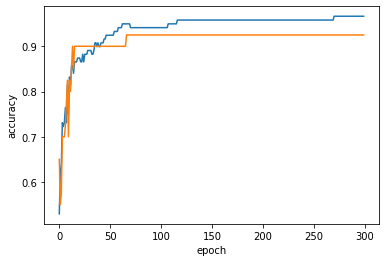

In [39]:
# 300번의 에포크 동안 기록한 점수 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음

에포크 초기에는 과소적합 - 훈련 세트와 테스트 세트의 점수가 낮음

=> 백 번째 에포크가 적절한 반복 횟수



### **에포크 100으로 맞추고 다시 훈련**
SGDClassifier 반복 횟수 100으로 맞추고 모델 훈련

최종적 훈련 세트와 테스트 세트 점수 출력


In [40]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier 는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤

* tol : 향상될 최솟값 지정﻿

 tol 매개변수 None 지정 - 자동으로 멈추지 않고 max_iter = 100만큼 무조건 반복

최종 점수 좋음

확률적 경사 하강법을 사용한 생선 분류 문제 성공적 수행!